In [2]:
import mysql.connector                   # This will connect us to MySQL Workbench
from mysql.connector import errorcode    # This will catch some errors that might arise when connecting
import matplotlib.pyplot as plt          # We'll generate the plot with matplotlib
import numpy as np                       # Standard math and array library
import pandas as pd                      # Standard dataframe library
%matplotlib notebook

In [3]:
# Connect to the database
try:
  conn = mysql.connector.connect(user='root', password='Drew$kiWi1kins09!',
                              host='127.0.0.1',
                              database='NovaDB')
except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Wrong user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Database does not exist")
  else:
    print(err)
else:
  conn.close()

In [11]:
# Sample query
conn = mysql.connector.connect(user='root', password='Drew$kiWi1kins09!', host='127.0.0.1', database='NovaDB')
cursor = conn.cursor()

# It's important to limit the distance because when distance = 100000 it throws the entire scale off
query = ("SELECT * "
         "FROM Star "
         "WHERE ConstellationID = 'Ori' "
         "AND Distance <= 50000 ")

cursor.execute(query)
result = pd.DataFrame(cursor.fetchall(), columns= ["HipparcosID", "HenryDraperID", "HarvardRevisedID", "GlieseID",
        "BayerFlamsteed", "ProperName", "RA", "Dec", "Distance", "Magnitude", "AbsoluteMagnitude", "SpectralType",
        "ColorIndex", "X", "Y", "Z", "RA(radians)", "Dec(radians)", "ConstellationID", "Luminosity", "CompanionID",
        "PrimaryCompanionID", "BaseName", "VariableStarID", "VariableMinMagnitude", "VariableMaxMagnitude"])

#result = pd.DataFrame(cursor.fetchall(), columns= ["ConstellationID", "ConstellationName", "Shape"])
#print(result[["ConstellationID", "ConstellationName"]])

cursor.close()
conn.close()

In [12]:
# This definition will give us attributes for the scatterplot based on the star's spectral type
def StarType(spectraltype):
    # Define a few empty lists (or arrays)
    startype = list(spectraltype)   # This holds the letter of the spectral type: O B A F G K M C or U for Unknown
    starsize = np.zeros(len(spectraltype))  # This will determine the size of the star on the plot
    starcolor = ["" for star in range(0, len(spectraltype))]  # Determines color on the plot
    # Go through every search result and assign the relevant attributes
    for i in range(0, len(spectraltype)):
        # Try to grab the first letter of spectral type
        try:
            startype[i] = spectraltype[i][0]
        except:
        # If it didn't work, it's because the value was null, so we assign it "U" for "Unknown"
            startype[i] = "U"
        # Then, depending on the spectral type, assign some meaningful sizes and colors
        if startype[i] == "O":
            starsize[i] = 4
            starcolor[i] = "blue"
        elif startype[i] == "B":
            starsize[i] = 3.5
            starcolor[i] = "darkturquoise"
        elif startype[i] == "A":
            starsize[i] = 3
            starcolor[i] = "paleturquoise"
        elif startype[i] == "F":
            starsize[i] = 2.5
            starcolor[i] = "white"
        elif startype[i] == "G":
            starsize[i] = 2
            starcolor[i] = "yellow"
        elif startype[i] == "K":
            starsize[i] = 1.5
            starcolor[i] = "orange"
        elif startype[i] == "M":
            starsize[i] = 1
            starcolor[i] = "red"
        elif startype[i] == "C":
            starsize[i] = 3
            starcolor[i] = "maroon"
        else:
            starsize[i] = 2
            starcolor[i] = "gold"
    return(startype, starsize, starcolor)

In [13]:
# Get the attributes for each star from it's spectral type
startype, starsize, starcolor = StarType(result["SpectralType"])

<IPython.core.display.Javascript object>


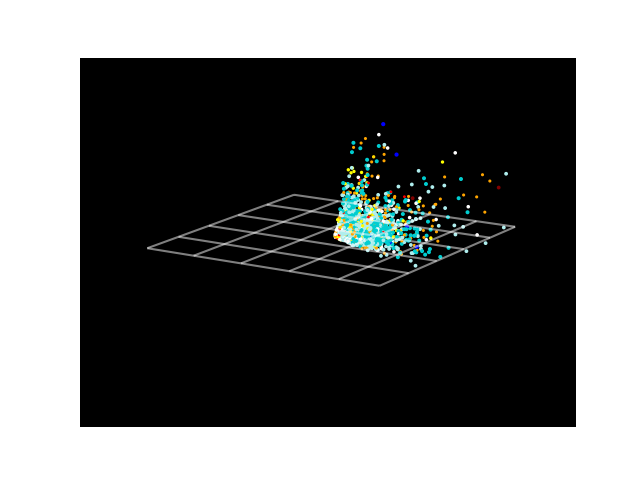

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Read the data from the query as a list
xs = list(pd.to_numeric(result["X"]))
ys = list(pd.to_numeric(result["Y"]))
zs = list(pd.to_numeric(result["Z"]))

# Draw the scatterplot using the colors and sizes we determined above
ax.scatter(xs, ys, zs, c= starcolor, s= starsize, depthshade= False)

# The axis wont be centered initially, so let's fix that.  Start by getting the max value on each dimension
xlim = max(np.abs(ax.get_xlim()))
ylim = max(np.abs(ax.get_ylim()))
zlim = max(np.abs(ax.get_zlim()))
# Then set the axis on each dimension such that 0 is in the middle of the max value
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)
ax.set_zlim(-zlim, zlim)

# Draw a plane at z= 0.  This is purely for asthetics so you can get a sense of each star's location
xx, yy = np.meshgrid(np.arange(-xlim, xlim, 5), np.arange(-ylim, ylim, 5))
z = xx * 0
ax.plot_wireframe(xx, yy, z, alpha=0.5, rcount= 5, ccount= 5, colors= "w")

# Draw lines from the z=0 plane to the star if there's only a few stars.  Otherwise this takes WAY too long.
if len(xs) < 1000:
    for i,j,k in zip(xs, ys, zs):
        if (i != 0) and (j != 0) and (k != 0):
            if k >= 0: ax.plot([i,i],[j,j],[0,k],color = 'b', alpha= .3)
            else: ax.plot([i,i],[j,j],[0,k], color = 'r', alpha= .3)

ax.set_facecolor('black')
ax.grid(False)
ax.set_axis_off()
plt.show()